In [64]:
#### Author: Piyush Verma
#### Topic: Final Python Project submission
#### Case: Building a statistical model to predict New York Taxi Trip Durations
#### Data: New York Taxi ride from Kaggle competition https://www.kaggle.com/c/nyc-taxi-trip-duration
#### Date: 04/12/2018

#### STRATEGY: 
#### 1: Read the data 
#### 2: Perform EDA and data massaging
#### 3: Split the data into training and testing
#### 4: Fit different models
#### 5: Perform prediction

#### PROBLEM STATEMENT: 
#### The TLC licenses and regulates over 50,000 vehicles and approximately 100,000 drivers, 
#### and performs safety and emissions inspections of the 13,587 medallions, making it the most 
#### active taxi and limousine licensing regulatory agency in the United States. However, with 
#### ever growing population and the corresponding increase in traffic congestion brought by 
#### it makes it important for taxi drivers as well as commuters to know how much time it would 
#### take for the trip to get completed. This problem gets complex when factors such as Time of 
#### the day, Day of the week and associated weather with respect to seasons in a year are 
#### incorporated. 

#### GOAL:
#### Accurately predicting the duration of each trip would help drivers know the exact financial 
#### value of each trip for their time investment spent driving in traffic at a day/time along 
#### with weather conditions (which could be extreme depending on time of the year). Similarly, 
#### the prediction would help customers plan their trips according thereby helping them to plan 
#### their day better. 

#### HOW TO USE:
#### Put the raw data file in the Python's working directoy
#### Put the module file in the Python's working directoy
#### Run the codes one by one
#### Write the output file in the same file 

#### DATA FIELDS
#### id - a unique identifier for each trip
#### vendor_id - a code indicating the provider associated with the trip record
#### pickup_datetime - date and time when the meter was engaged
#### dropoff_datetime - date and time when the meter was disengaged
#### passenger_count - the number of passengers in the vehicle (driver entered value)
#### pickup_longitude - the longitude where the meter was engaged
#### pickup_latitude - the latitude where the meter was engaged
#### dropoff_longitude - the longitude where the meter was disengaged
#### dropoff_latitude - the latitude where the meter was disengaged
#### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
#### trip_duration - duration of the trip in seconds

In [43]:
#### Reading the data from the .csv file
import pandas as pd
import numpy as np
np.random.seed(12396911)
new_york_original = pd.read_csv("C:/0000/Project X/New York Taxi Trip Duration/new_york_taxi_rides.csv")
new_york_original.head(n=5) # Prints the head of the dataset
ny = new_york_original.sample(20000)

In [44]:
#### Using a module, function and error handling (inside the function)
from module_pro import summary
summary(ny)

The size of your dataset is: 20000 X 10
  
Below are your columns and the datatypes:
  
Unnamed: 0: int64
vendor_id: int64
passenger_count: int64
store_and_fwd_flag: object
month: int64
date: int64
weekday: object
time: int64
distance: float64
trip_duration: int64


In [45]:
#### Changing the datatype
del ny['Unnamed: 0']  
ny['vendor_id'] = ny['vendor_id'].astype('category')
ny['store_and_fwd_flag'] = ny['store_and_fwd_flag'].astype('category')
ny['month'] = ny['month'].astype('category')
ny['date'] = ny['date'].astype('category')
ny['weekday'] = ny['weekday'].astype('category')
ny['time'] = ny['time'].astype('category')

ny['trip_duration'] = ny['trip_duration'].astype(float)
ny['trip_duration'] = ny['trip_duration'].astype(float)
ny.dtypes

vendor_id             category
passenger_count          int64
store_and_fwd_flag    category
month                 category
date                  category
weekday               category
time                  category
distance               float64
trip_duration          float64
dtype: object

In [46]:
#### Understanding through the summary of the clean data
pd.options.display.float_format = '{:.2f}'.format
ny.describe(include = 'all') # Prints the summary

,vendor_id,passenger_count,store_and_fwd_flag,month,date,weekday,time,distance,trip_duration
count,20000.00,20000.00,20000,20000.00,20000.00,20000,20000.00,20000.00,20000.00
unique,2.00,nan,2,6.00,31.00,7,24.00,nan,nan
top,2.00,nan,N,3.00,12.00,Friday,18.00,nan,nan
freq,10598.00,nan,19896,3511.00,729.00,3051,1272.00,nan,nan
mean,nan,1.66,NaN,nan,nan,NaN,nan,2.91,733.09
std,nan,1.31,NaN,nan,nan,NaN,nan,2.90,449.42
min,nan,1.00,NaN,nan,nan,NaN,nan,0.00,22.00
25%,nan,1.00,NaN,nan,nan,NaN,nan,1.20,385.00
50%,nan,1.00,NaN,nan,nan,NaN,nan,1.98,631.00
75%,nan,2.00,NaN,nan,nan,NaN,nan,3.47,997.00


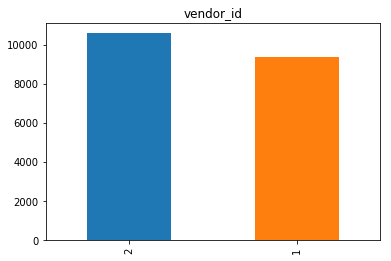

In [47]:
#### Exploratory Data Analysis
%matplotlib inline

month_order = [1, 2, 3, 4, 5, 6]
date_order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#### Histograms
import matplotlib.pyplot as plt

In [ ]:
#### Histogram: Vendor ID
ny['vendor_id'].value_counts().plot(kind = 'bar', title = 'vendor_id')

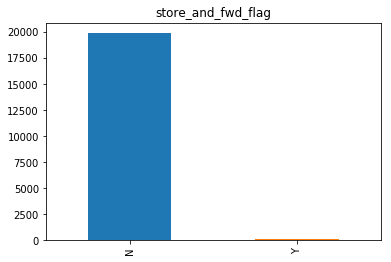

In [48]:
#### Histogram: GPS Data Flag
ny['store_and_fwd_flag'].value_counts().plot(kind = 'bar', title = 'store_and_fwd_flag')

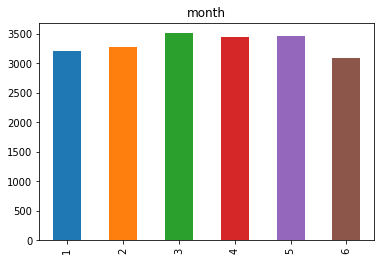

In [49]:
#### Histogram: Month of the year
ny['month'].value_counts().loc[month_order].plot(kind = 'bar', title = 'month')

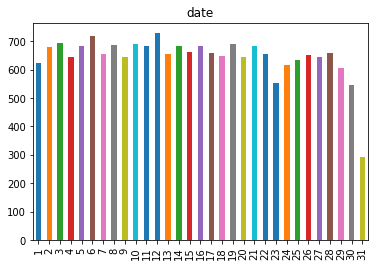

In [50]:
#### Histogram: Day of the month
ny['date'].value_counts().loc[date_order].plot(kind = 'bar', title = 'date')

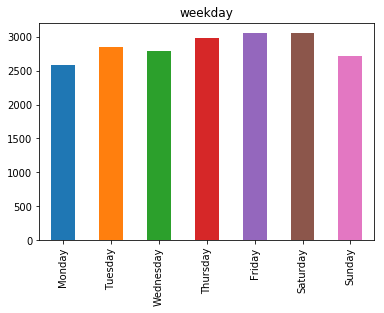

In [51]:
#### Histogram: Week of the day
ny['weekday'].value_counts().loc[weekday_order].plot(kind = 'bar', title = 'weekday')

Text(0.5,1,'Ride Dsitance (km)')

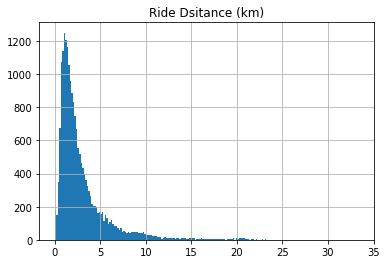

In [33]:
#### Histogram: Trip distance
ny['distance'].hist(bins=200).set_title("Ride Dsitance (km)")

Text(0.5,1,'Ride Duration (seconds)')

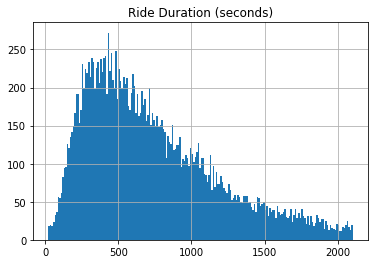

In [34]:
#### Histogram: Trip duration
ny['trip_duration'].hist(bins=200).set_title("Ride Duration (seconds)")

In [52]:
#### Creating dummies for the categorical variables
ny = pd.get_dummies(ny)
ny.iloc[:,:].head(5)

,passenger_count,distance,trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,month_1,month_2,month_3,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
152162,2,3.85,712.00,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154530,5,1.63,922.00,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1259090,1,1.98,1644.00,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
469838,2,10.03,1464.00,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
921844,1,2.38,430.00,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [53]:
#### Converting panda dataframes to numpy arrays

#### Labels are the values we want to predict
labels = np.array(ny['trip_duration'])

#### Remove the labels from the features, axis 1 refers to the columns
ny = ny.drop('trip_duration', axis = 1)

#### Saving column names for the future use: Visualizations
feature_list = list(ny.columns)

#### Convert to numpy array
ny = np.array(ny)

In [54]:
#### Training and Testings
from sklearn.model_selection import train_test_split
#### Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(ny, labels, test_size = 0.20, random_state = 42)

#### Check the shape of the data
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16000, 74)
Training Labels Shape: (16000,)
Testing Features Shape: (4000, 74)
Testing Labels Shape: (4000,)


In [55]:
#### Fit different models
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features = 10) # initialize
rf = rf.fit(train_features, train_labels) # fit the data to the algorithm

In [39]:
rf_predictions = rf.predict(test_features)

In [18]:
import math
#### Accuracy: MSPE
round(math.sqrt(sum((rf_predictions-test_labels)**2)/len(rf_predictions)),2)


#### Tuning the Random Forest fit and finding the best
     # 457.97 n_estimators=10, max_features = 10
     # 433.73 n_estimators=30, max_features = 10
     # 443.03 n_estimators=30
     # 464.25 n_estimators=30, max_features = 'sqrt'
#BEST# 431.91 n_estimators=30, max_features = 10

445.9

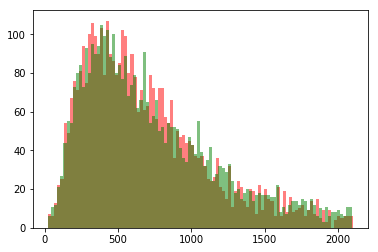

In [61]:
#### Visualization: Difference between Actual and Prediction
import matplotlib.pyplot as plt
plt.hist(rf_predictions, bins = 100, color = "red", lw=0, alpha=0.5)
plt.hist(test_labels, bins = 100, color = "green", lw=0, alpha=0.5)

#### Saving the output comparison file
#### Predictions seem to be closer to actual
plt.savefig("prediction_output.png")